In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
iris_data = load_iris()

# 데이터 셋 dataframe에 저장
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns=['class'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(y_train.shape)
y_train = y_train.values.ravel() # 경고메시지 방지(다차원배열 -> 1차원 배열)
print(y_train.shape)

(120, 1)
(120,)


In [6]:
# 랜덤 포레스트 모델 정의
model = RandomForestClassifier(n_estimators=100, max_depth=4)

In [7]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [9]:
y_test_prediction = model.predict(X_test)

y_test_prediction

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [12]:
# 모델 평가
model.score(X_test, y_test)

0.9

In [15]:
importances = model.feature_importances_ # 속성 중요도

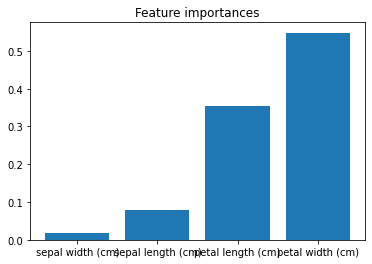

In [19]:
# 시각화 
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted])
plt.show()